<a href="https://colab.research.google.com/github/seongyeon1/test1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 5s 42ms/step - loss: 0.5519 - accuracy: 0.7739 - val_loss: 0.4254 - val_accuracy: 0.8688
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3402 - accuracy: 0.8960 - val_loss: 0.3296 - val_accuracy: 0.8779
Epoch 3/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2463 - accuracy: 0.9205 - val_loss: 0.2916 - val_accuracy: 0.8876
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1963 - accuracy: 0.9350 - val_loss: 0.2818 - val_accuracy: 0.8867
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1567 - accuracy: 0.9491 - val_loss: 0.2884 - val_accuracy: 0.8868


### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [13]:
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5046 - accuracy: 0.7883 - val_loss: 0.3944 - val_accuracy: 0.8432
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2939 - accuracy: 0.8981 - val_loss: 0.2931 - val_accuracy: 0.8910
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2110 - accuracy: 0.9312 - val_loss: 0.3410 - val_accuracy: 0.8610
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1699 - accuracy: 0.9442 - val_loss: 0.2767 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1349 - accuracy: 0.9577 - val_loss: 0.2987 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1119 - accuracy: 0.9647 - val_loss: 0.3081 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0898 - accuracy: 0.9743 - val_loss: 0.3452 - val_accuracy: 0.8776
Epoch 8/20
30

In [11]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

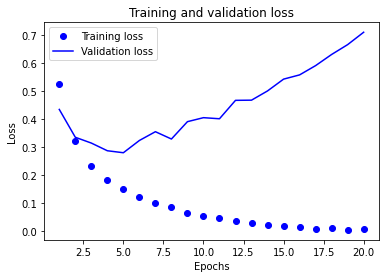

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [15]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model2_dr.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.6307 - accuracy: 0.6385 - val_loss: 0.4990 - val_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4901 - accuracy: 0.7808 - val_loss: 0.3889 - val_accuracy: 0.8743
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4117 - accuracy: 0.8293 - val_loss: 0.3206 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3434 - accuracy: 0.8720 - val_loss: 0.2894 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2986 - accuracy: 0.8877 - val_loss: 0.2800 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2616 - accuracy: 0.9056 - val_loss: 0.2740 - val_accuracy: 0.8900
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2308 - accuracy: 0.9143 - val_loss: 0.2800 - val_accuracy: 0.8925
Epoch 8/20
30

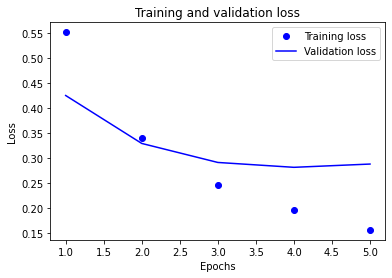

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [18]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, 
                 kernel_regularizer=regularizers.l1(0.001),
                 activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [19]:
model2_dr.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model2_dr.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5723 - accuracy: 0.7877 - val_loss: 0.4255 - val_accuracy: 0.8729
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3473 - accuracy: 0.9025 - val_loss: 0.3441 - val_accuracy: 0.8900
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2652 - accuracy: 0.9275 - val_loss: 0.3413 - val_accuracy: 0.8801
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2109 - accuracy: 0.9460 - val_loss: 0.3182 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1771 - accuracy: 0.9573 - val_loss: 0.3236 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1499 - accuracy: 0.9660 - val_loss: 0.3356 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1260 - accuracy: 0.9738 - val_loss: 0.3984 - val_accuracy: 0.8737
Epoch 8/20
30

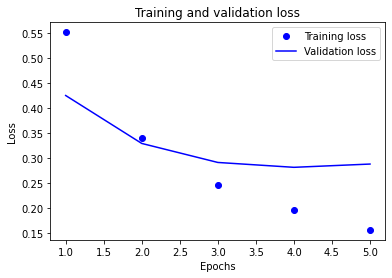

In [20]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()